In [1]:
# Loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [2]:
# Reading data
dataset = pd.read_csv('USA_Housing.csv')

In [ ]:
# Top data
dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
# Saving dataframe
df  = dataset

In [ ]:
# Checking NANs
print("Checking if any null values are present", dataset.isna().sum())

Checking if any null values are present Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64


In [ ]:
# Spliting label and features columns
feature_cols = ["Avg. Area Income", "Avg. Area House Age", "Avg. Area Number of Rooms", "Avg. Area Number of Bedrooms","Area Population"]
label_cols = ["Price"]

In [ ]:
# Splitting training and test set
df_train, df_test = train_test_split(df, test_size = 0.3, shuffle = True)

In [ ]:
# Training Set
X_train = df_train.loc[:, feature_cols].values
y_train = df_train.loc[:, label_cols].values

In [ ]:
# Test Set
X_test = df_test.loc[:, feature_cols].values
y_test = df_test.loc[:, label_cols].values

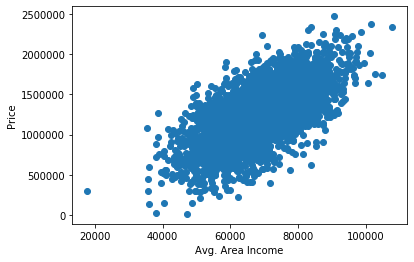

In [ ]:
# 
plt.scatter(X_train[:,0], y_train)
plt.xlabel('Avg. Area Income')
plt.ylabel('Price')
plt.show()

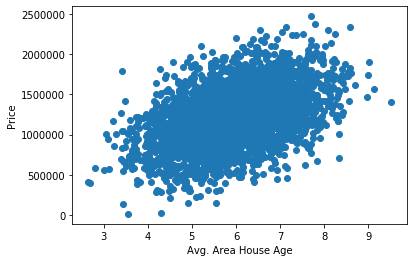

In [ ]:
plt.scatter(X_train[:,1], y_train)
plt.xlabel('Avg. Area House Age')
plt.ylabel('Price')
plt.show()

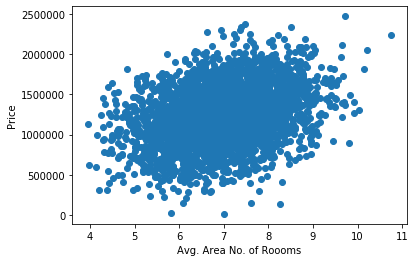

In [ ]:
plt.scatter(X_train[:,2], y_train)
plt.xlabel('Avg. Area No. of Roooms')
plt.ylabel('Price')
plt.show()

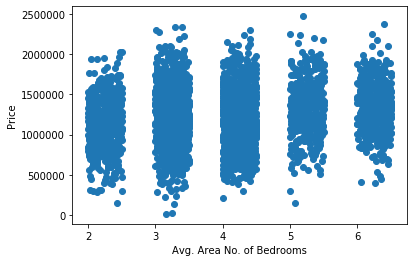

In [ ]:
plt.scatter(X_train[:,3], y_train)
plt.xlabel('Avg. Area No. of Bedrooms')
plt.ylabel('Price')
plt.show()

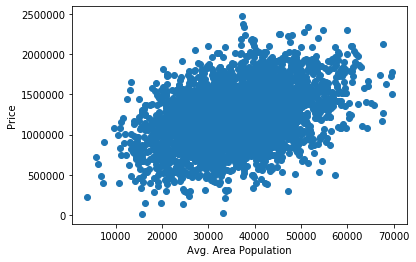

In [ ]:
plt.scatter(X_train[:,4], y_train)
plt.xlabel('Avg. Area Population')
plt.ylabel('Price')
plt.show()

In [ ]:
# Linear Regressor
regressor = LinearRegression()
regressor.fit(X_train, y_train)  
y_test_pred = regressor.predict(X_test)

In [ ]:
# Calculate Mean Absolute Error between y_test and y_test_pred
# Calculate Mean Squared Error between y_test and y_test_pred
# Calculate Root Mean Squared Error between y_test and y_test_pred
# Calculate R2 between y_test and y_test_pred
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('R2 :', metrics.r2_score(y_test, y_test_pred))

Mean Absolute Error: 80827.30047926039
Mean Squared Error: 10166516512.535904
Root Mean Squared Error: 100829.14515424547
R2 : 0.9218909291191121


In [ ]:
regressor.coef_

array([[2.13646930e+01, 1.65555492e+05, 1.20777616e+05, 1.40966795e+03,
        1.50740203e+01]])

In [ ]:
regressor.intercept_

array([-2618645.91826554])

In [ ]:
# Adding Polynomial features
poly = PolynomialFeatures(3)

In [ ]:
X_train_poly = poly.fit_transform(X_train)

In [ ]:
X_test_poly = poly.fit_transform(X_test)

In [ ]:
# Fitting the model
regressor_poly = LinearRegression()
regressor_poly.fit(X_train_poly, y_train)
y_pred_poly = regressor_poly.predict(X_test_poly)

In [ ]:
# Calculate Mean Absolute Error between y_test and y_test_pred
# Calculate Mean Squared Error between y_test and y_test_pred
# Calculate Root Mean Squared Error between y_test and y_test_pred
# Calculate R2 between y_test and y_test_pred
print('Mean Absolute Error Poly:', metrics.mean_absolute_error(y_test, y_pred_poly))  
print('Mean Squared Error Poly:', metrics.mean_squared_error(y_test, y_pred_poly))  
print('Root Mean Squared Error Poly:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))
print('R2 Poly:', metrics.r2_score(y_test, y_pred_poly))

Mean Absolute Error Poly: 86522.77742768703
Mean Squared Error Poly: 11721307092.098642
Root Mean Squared Error Poly: 108264.98553132791
R2 Poly: 0.9099455152269244


In [ ]:
regressor_poly.coef_

array([[ 0.00000000e+00,  2.13161100e+01,  1.76725030e+05,
         1.26492868e+05,  1.54340959e+04,  1.34009382e+01,
         7.05571776e-06, -2.00274908e-02, -2.49105057e-01,
         7.02724048e-02,  2.75513558e-05,  8.85379386e+02,
        -1.67555166e+03, -1.33868315e+03, -7.50201232e-02,
         1.75040370e+03, -3.93595913e+02, -5.21195771e-04,
        -1.14939173e+03, -6.89710872e-03,  3.97540172e-06]])

In [ ]:
regressor_poly.intercept_

array([-2686136.73875487])